In [ ]:
# Baseball Case Study
# Samrat Dey
# Batch - DS2312

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Baseball/baseball.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


The dataset contains several different indicators of success of a baseball team which contains numerical data. Here 'W' is the target variable which contains continuous data, so it will be temed as 'Regression Problem' where we need to predict the Number of wins.

In [3]:
df.shape

(30, 17)

The dataset contains 30 rows and 17 columns, out of which 1 column is taraget variable and the remaining 16 columns are independent variables

In [4]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [5]:
df.columns.tolist()

['W',
 'R',
 'AB',
 'H',
 '2B',
 '3B',
 'HR',
 'BB',
 'SO',
 'SB',
 'RA',
 'ER',
 'ERA',
 'CG',
 'SHO',
 'SV',
 'E']

In [6]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

There are two different types of data (int64, float64) present in the dataset

In [7]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


<Axes: >

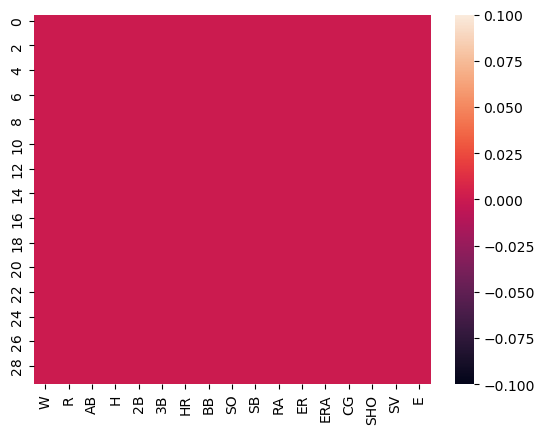

In [9]:
sns.heatmap(df.isnull())

In [10]:
# Checking nmber of unique values in each column
df.nunique().to_frame("No. of Unique values")

,No. of Unique values
W,24
R,28
AB,29
H,29
2B,22
3B,23
HR,27
BB,29
SO,29
SB,27


In [11]:
# Statistical summary of numerical columns
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


1. The counts of all the columns are same which means there are no missing values in the dataset
2. The mean value is greater than the median(50%) in AB, H, 3B, HR, CG, SV, E which means the data is skewed to right in these columns
3. The mean value is lesser than the median(50%) in W, R, 2B, BB, SO, RA, ER, ERA, SHO which means the data is skewed to left in these columns
4. By summerizing the data we can observe that there are difference between 75% and max in all the columns, hence there are outliers present in the data

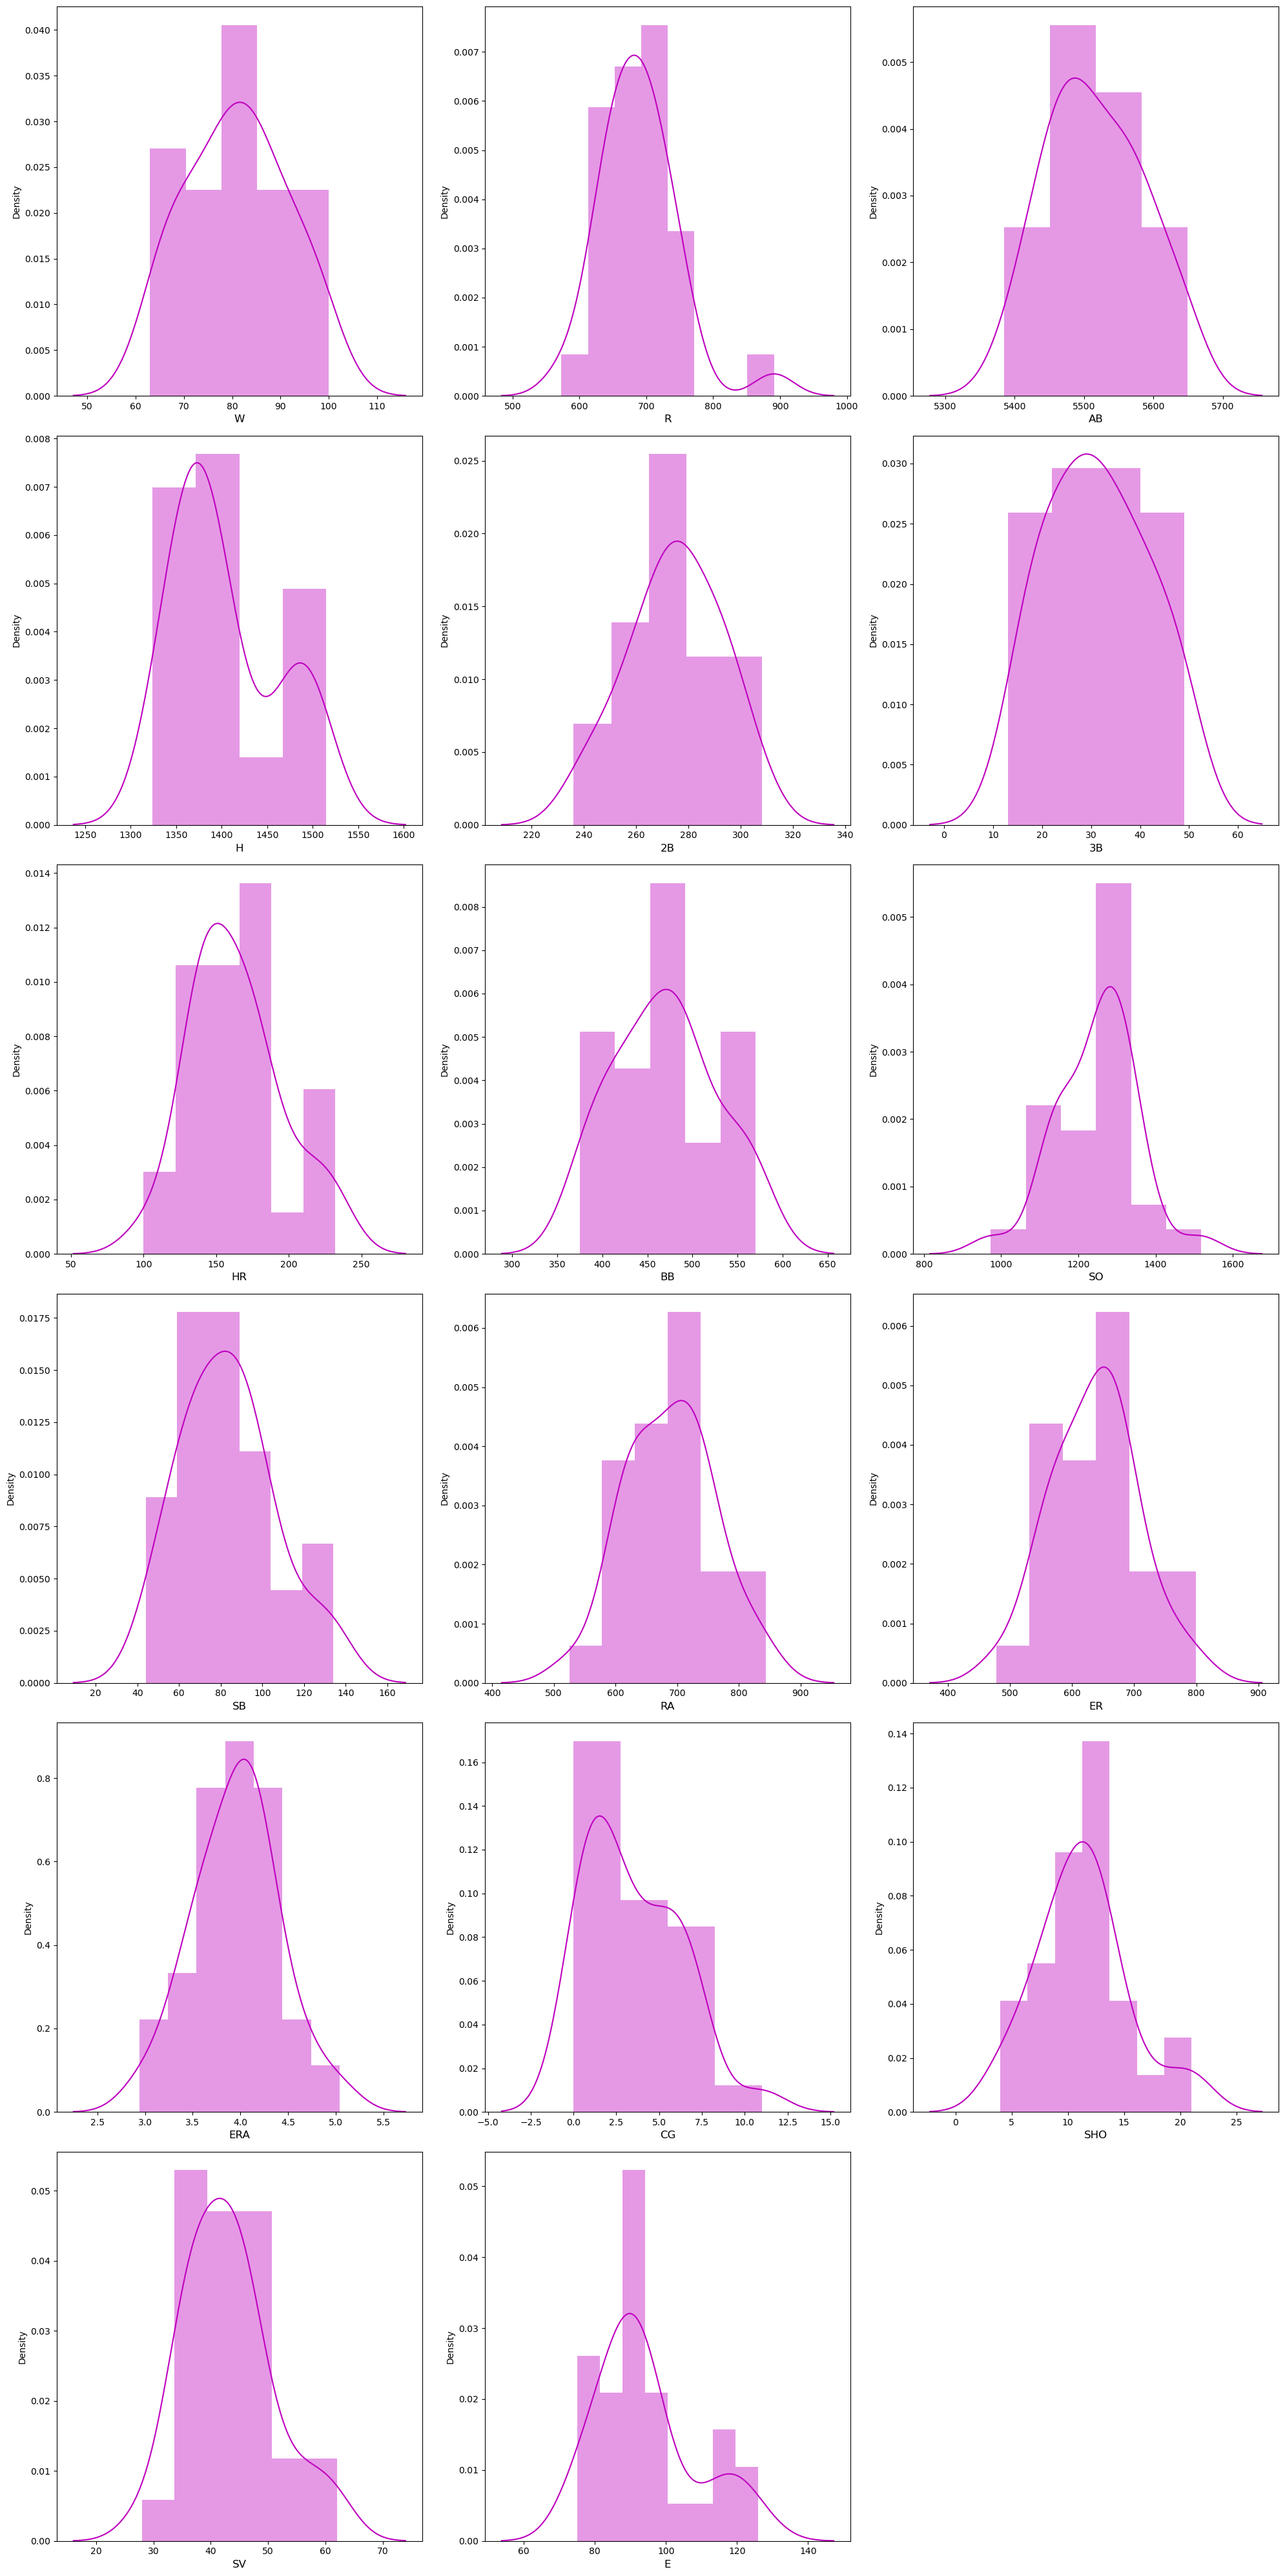

In [12]:
plt.figure(figsize=(20,40),facecolor="white")
plotnumber=1
for col in df:
    if plotnumber<=17:
        ax=plt.subplot(6,3,plotnumber)
        sns.distplot(df[col],color="m")
        plt.xlabel(col, fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [13]:
y=df['W']
x=df.drop(columns=['W'])

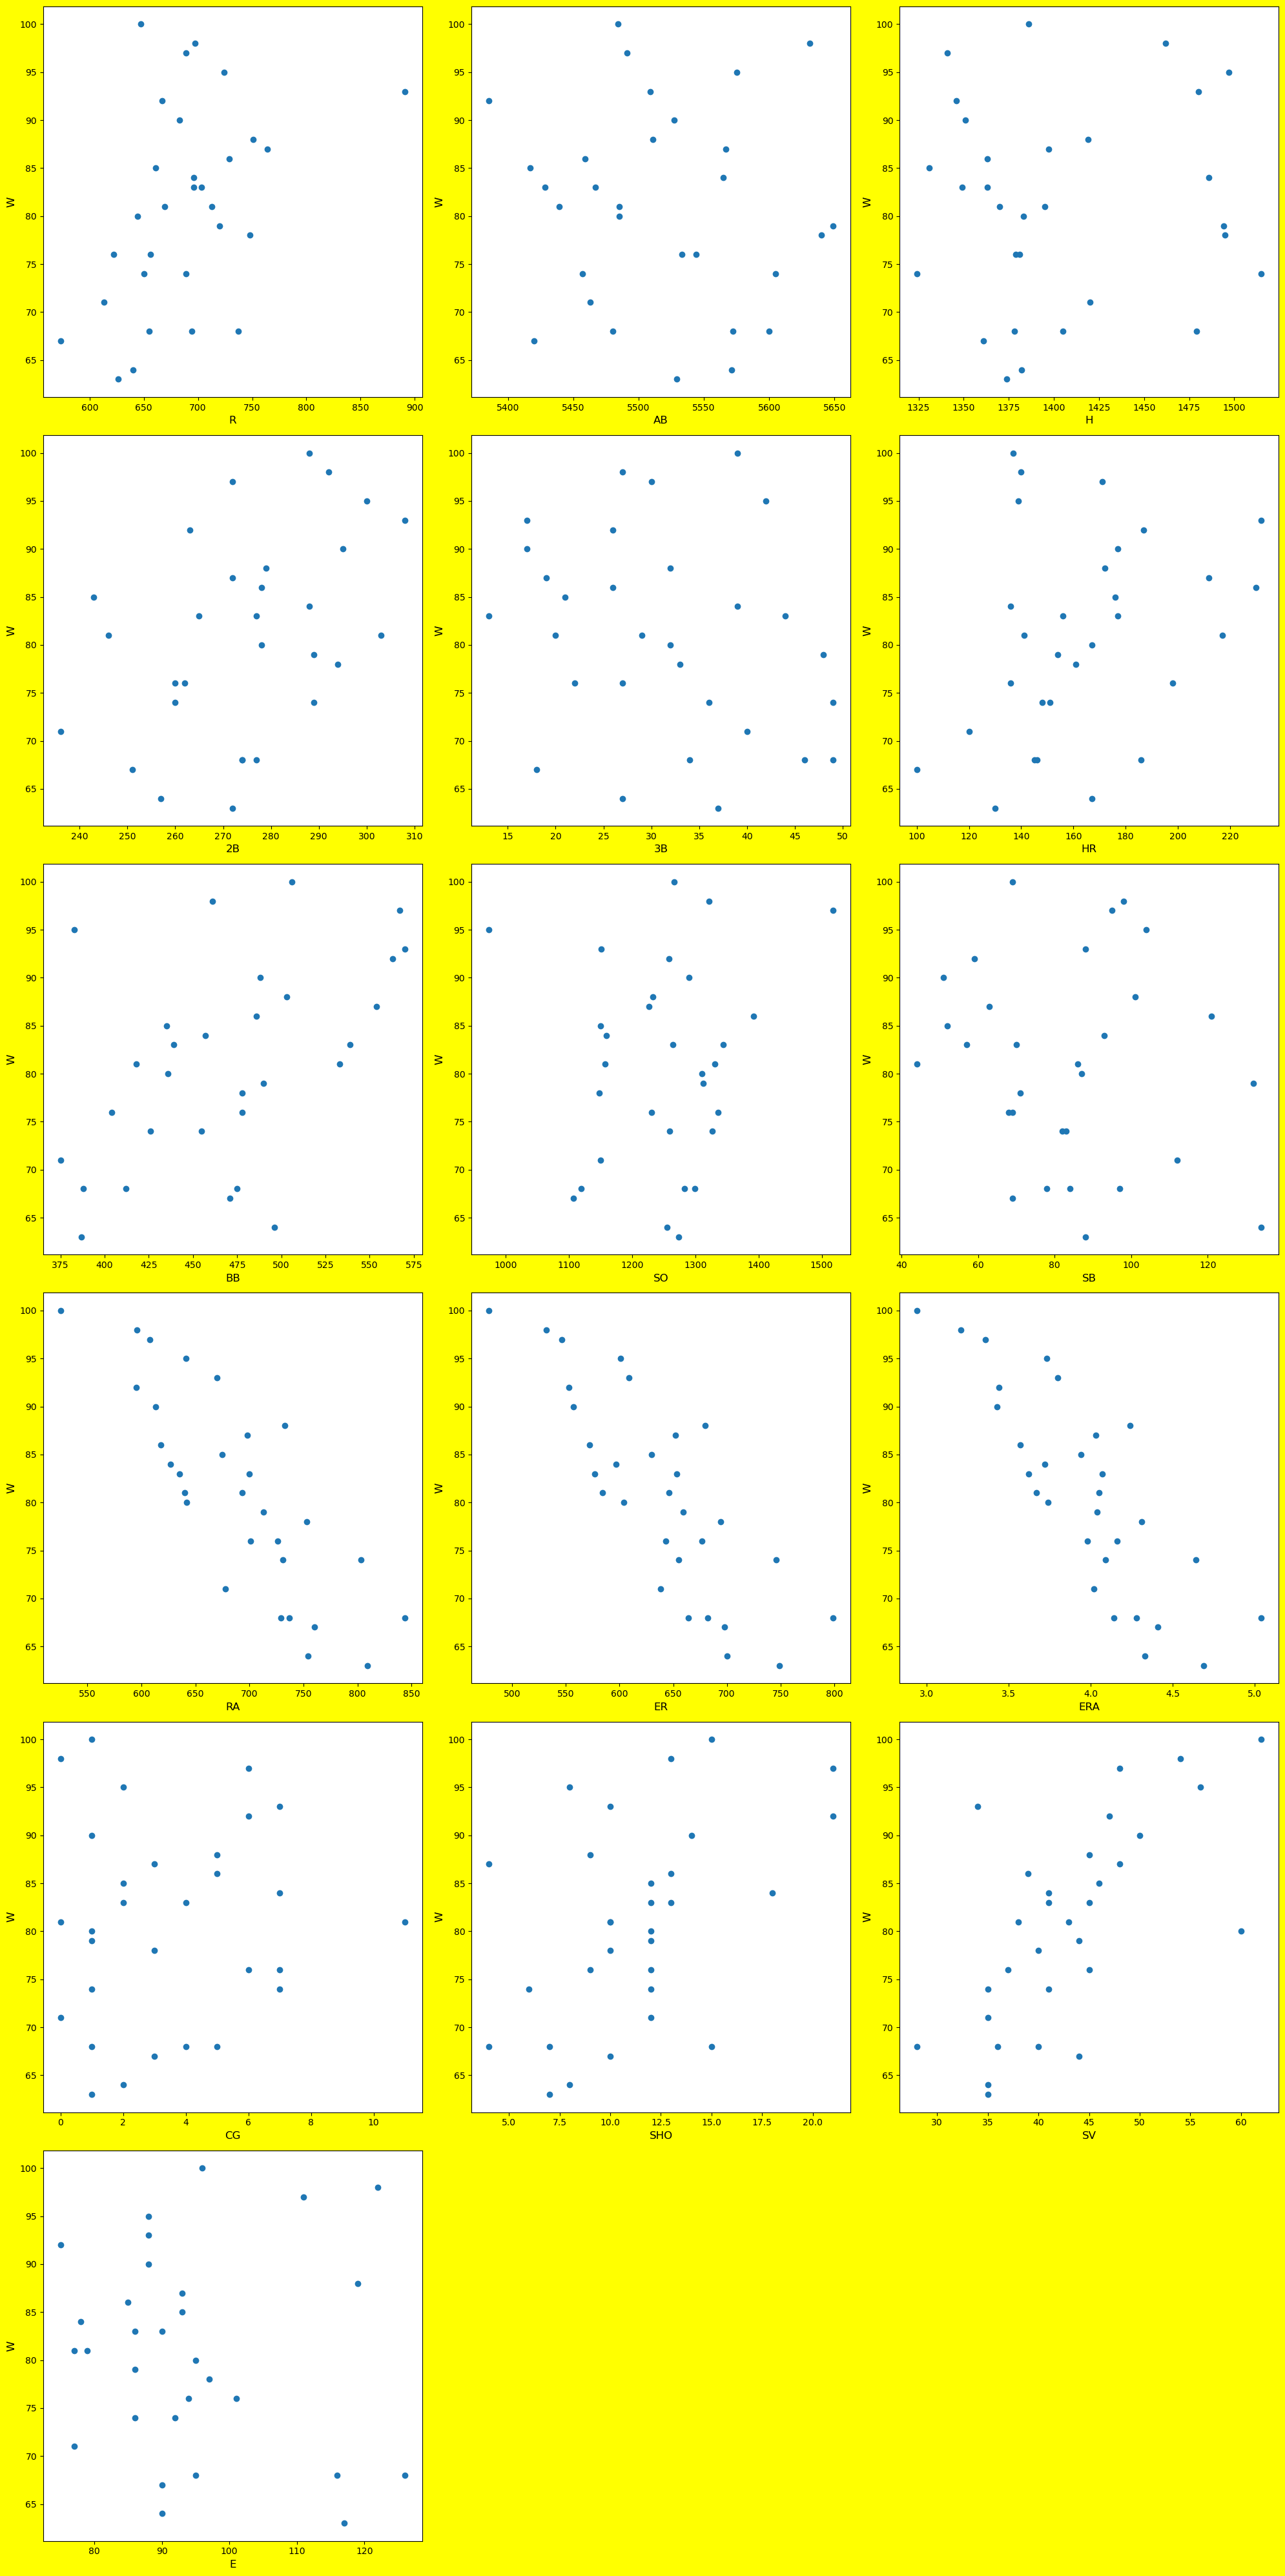

In [15]:
plt.figure(figsize=(20,40),facecolor="Yellow")
plotnumber=1
for col in x:
    if plotnumber<=17:
        ax=plt.subplot(6,3,plotnumber)
        plt.scatter(x[col],y)
        plt.xlabel(col,fontsize=12)
        plt.ylabel('W', fontsize=12)
    plotnumber+=1
plt.tight_layout()

As all the features shows a positive trend, it means all the features are important in building the model. The relationship between dependent and independent variables look fairly linear. Thus, our linearly assumption satisfied.

In [16]:
# Data Scaling
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[ 0.61907797,  0.84773126,  1.66368512,  1.42017307,  1.04119304,
        -0.7872986 , -1.53490242, -2.69762957,  0.91388329, -0.66623393,
        -0.50511008, -0.50695519, -0.5398062 , -0.81462859,  1.67160651,
        -0.46146963],
       [ 0.13443166, -0.71109353, -0.97068076,  0.12740339,  1.23580856,
        -0.24396668, -0.5365919 ,  0.15487844, -0.60182558,  0.16597077,
         0.24892985,  0.25459752, -0.5398062 ,  0.1728    ,  0.24987932,
        -0.60719689],
       [-0.33290586, -1.1152333 , -0.15189137,  1.58879521, -0.22380785,
        -0.7233772 ,  1.13914361, -0.89398189,  0.11144918, -0.68033909,
        -0.75162313, -0.64134684,  2.77264091, -0.32091429, -0.65485616,
        -1.11724227],
       [-1.14641931,  0.24152162, -0.40108814, -0.82812203, -0.41842337,
        -0.8831807 , -1.16053598, -0.16860185, -0.69098493,  0.18007593,
         0.10392217,  0.05301004,  1.3004422 , -0.56777144, -0.78410408,
         0.48575751],
       [ 0.01327008,  1.28073815,  1

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=300)
y_train.head()

22    71
25    92
23    67
28    74
20    90
Name: W, dtype: int64

In [18]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [19]:
# Before testing the model we'll try to predict on one sample
df.tail(2)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [20]:
print('Number of Predicted Wins is:',regression.predict(scaler.transform([[650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92]])))

Number of Predicted Wins is: [75.11812802]


Number of predictted wins is 75.11812802, but number of actual wins is 74

In [21]:
# Save the model before using it for prediction
pickle.dump(regression,open('reg_model','wb'))

In [22]:
# Prediction using the saved model
loaded_model=pickle.load(open('reg_model','rb'))
a=loaded_model.predict(scaler.transform([[737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95]]))
a

array([67.53104461])

In [30]:
# Predict the model on test data
x_test[1]
y_pred=regression.predict(x_test)
y_pred

array([83.4007141 , 79.26997345, 94.30041403, 98.66874282, 79.5815934 ,
       88.49575728, 68.59275819, 89.01022493])

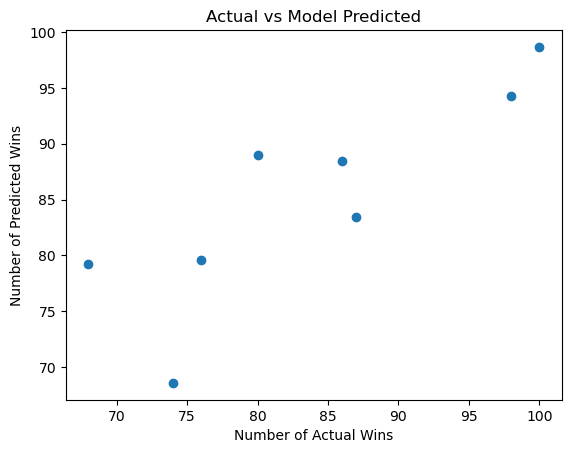

In [31]:
# Compare predicted label and actual label using visualization
plt.scatter(y_test,y_pred)
plt.xlabel('Number of Actual Wins')
plt.ylabel('Number of Predicted Wins')
plt.title('Actual vs Model Predicted')
plt.show()